<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task7/blob/main/Assignment_16(Random_forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Social_Network_Ads.csv

Importing the libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

Importing the dataset

In [55]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [56]:
df.shape
df.isnull().sum()
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [57]:
#userid is not required here so drop that column
df.drop("User ID",inplace=True,axis=1)
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [58]:
df=df.drop_duplicates()
df.shape

(380, 4)

In [59]:
#gender also has no impact for the prediction of purchasing a car, so drop the column
df.drop("Gender", axis=1, inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Splitting the dataset into the Training set and Test set

In [161]:
X = df.drop("Purchased",axis=1) # fts
y = df['Purchased'] # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # train- test split
X_train.shape

(304, 2)

In [162]:
y_test

253    1
249    1
95     0
169    0
69     0
      ..
84     0
8      0
382    1
129    0
151    0
Name: Purchased, Length: 76, dtype: int64

Feature Scaling

In [163]:
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test = scaler.transform(X_test) # transform the test data 

Fitting Random Forest to the Training set

In [164]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model 
rf = RandomForestClassifier(n_estimators= 100,max_depth = 1)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1)

Predicting the Test set results

In [165]:
y_pred=rf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

Making the Confusion Matrix

In [166]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[51,  4],
       [ 1, 20]])

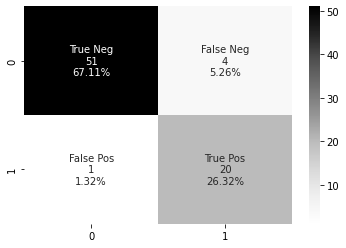

In [167]:
import seaborn as sns
group_names = ["True Neg","False Neg","False Pos","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Greys')

Visualising the Training set results

Accuracy : 0.9342105263157895
Roc_Auc-score : 0.9398268398268397


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


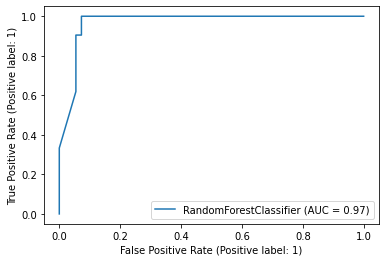

In [168]:
#Evaluating The Predection
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Roc_Auc-score :",roc_auc_score(y_test,y_pred))

plot_roc_curve(rf, X_test, y_test)

In [169]:
#Interpret Model Results
from sklearn import tree

In [170]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = list(df[['Age','EstimatedSalary']]), rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [172]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 1


Variable Importances

In [177]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(df[['Age','EstimatedSalary']]), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: EstimatedSalary      Importance: 0.53
Variable: Age                  Importance: 0.47
